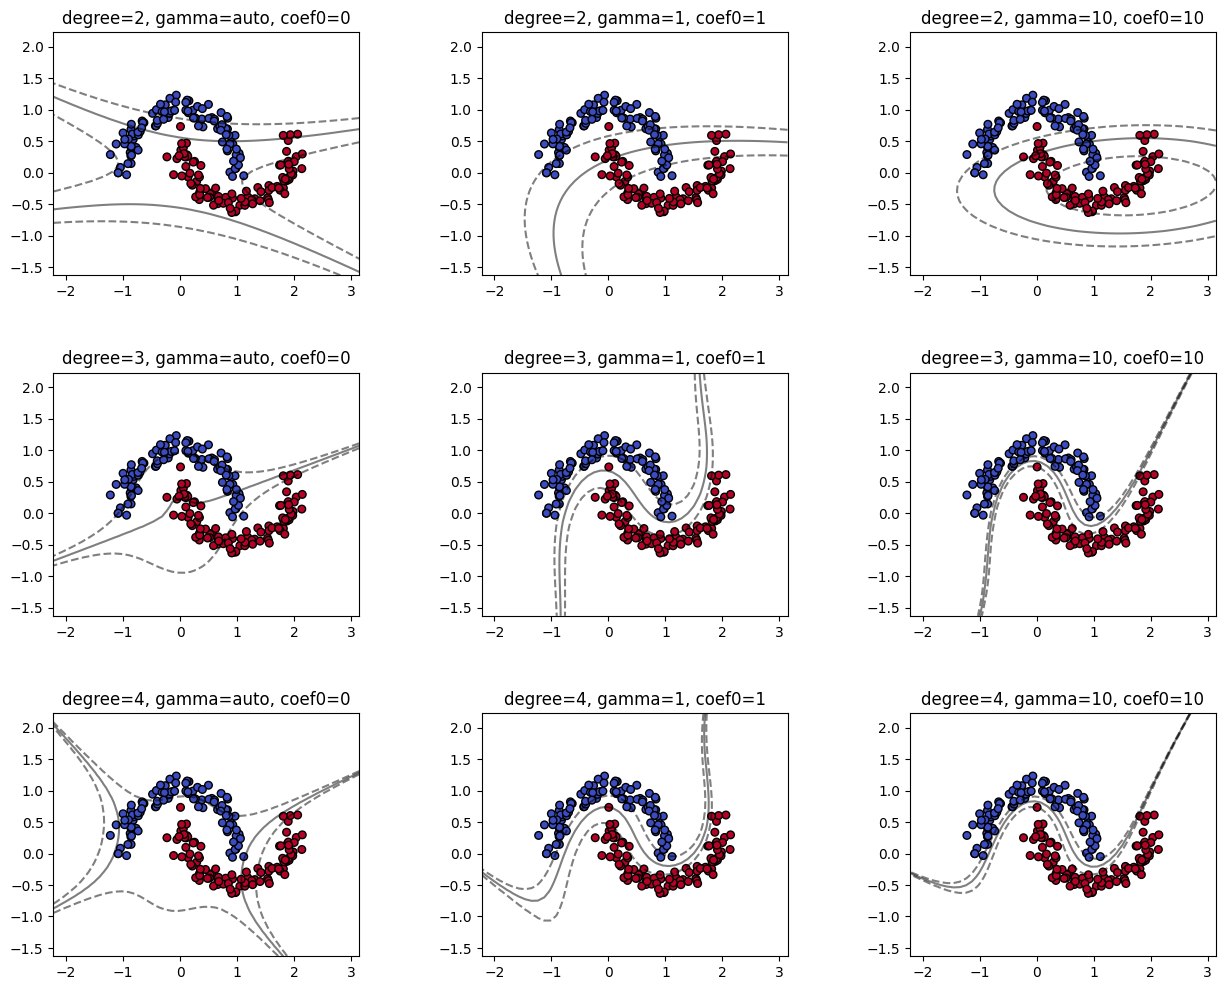

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate elliptical data
def generate_elliptical_data(n_samples, noise=0.1):
    np.random.seed(42)
    angles = np.linspace(0, 2 * np.pi, n_samples)
    x_ellipse = 2 * np.cos(angles) + noise * np.random.randn(n_samples)
    y_ellipse = np.sin(angles) + noise * np.random.randn(n_samples)
    X = np.vstack((x_ellipse, y_ellipse)).T
    y = np.hstack((np.zeros(n_samples // 2), np.ones(n_samples // 2)))
    return X, y

# Generate data
# X, y = generate_elliptical_data(200)
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Define a function to plot decision boundari
def plot_decision_boundary(model, X, y, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot the dataset points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

# Set different values of degree, gamma, and coef0
degrees = [2, 3, 4]
gamma_values = ['auto', 1, 10]
coef0_values = [0, 1, 10]

fig, axes = plt.subplots(len(degrees), len(gamma_values), figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

C_value = 1  # Keeping C constant to focus on the polynomial kernel's parameters

# Iterate over different parameter combinations
for i, degree in enumerate(degrees):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='poly', degree=degree, gamma=gamma, coef0=coef0_values[j], C=C_value)
        model.fit(X, y)
        axes[i, j].set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
        axes[i, j].set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
        plot_decision_boundary(model, X, y, ax=axes[i, j])
        axes[i, j].set_title(f"degree={degree}, gamma={gamma}, coef0={coef0_values[j]}")

plt.show()

---

RBF

---

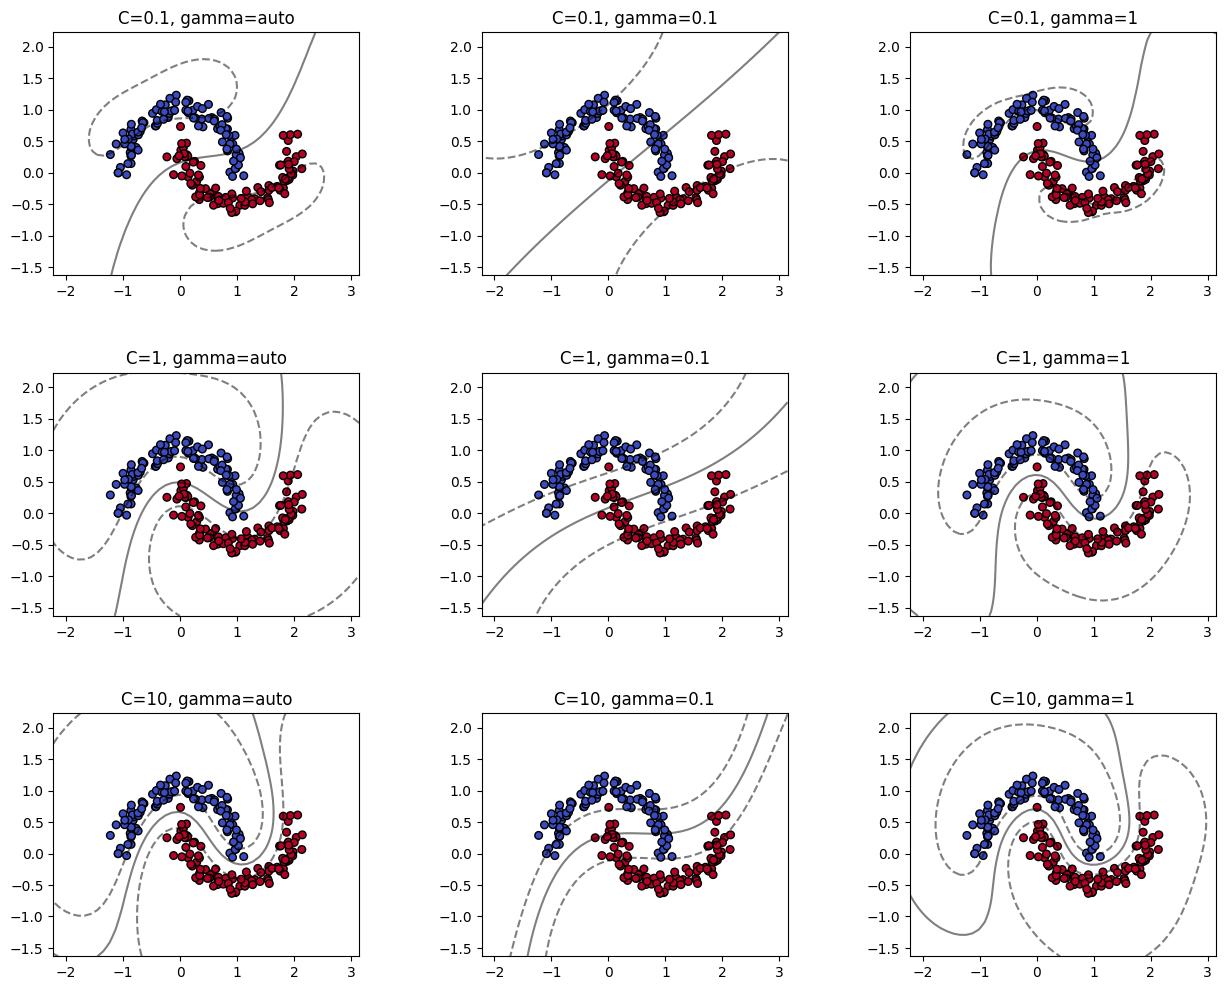

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

X, y = make_moons(n_samples=200, noise=0.1, random_state=42)


# Define a function to plot decision boundaries
def plot_decision_boundary(model, X, y, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot the dataset points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

# Set different values of C and gamma
C_values = [0.1, 1, 10]
gamma_values = ['auto', 0.1, 1]

fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterate over different parameter combinations
for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X, y)
        axes[i, j].set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
        axes[i, j].set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
        plot_decision_boundary(model, X, y, ax=axes[i, j])
        axes[i, j].set_title(f"C={C}, gamma={gamma}")

plt.show()

---

Sigmoid

---

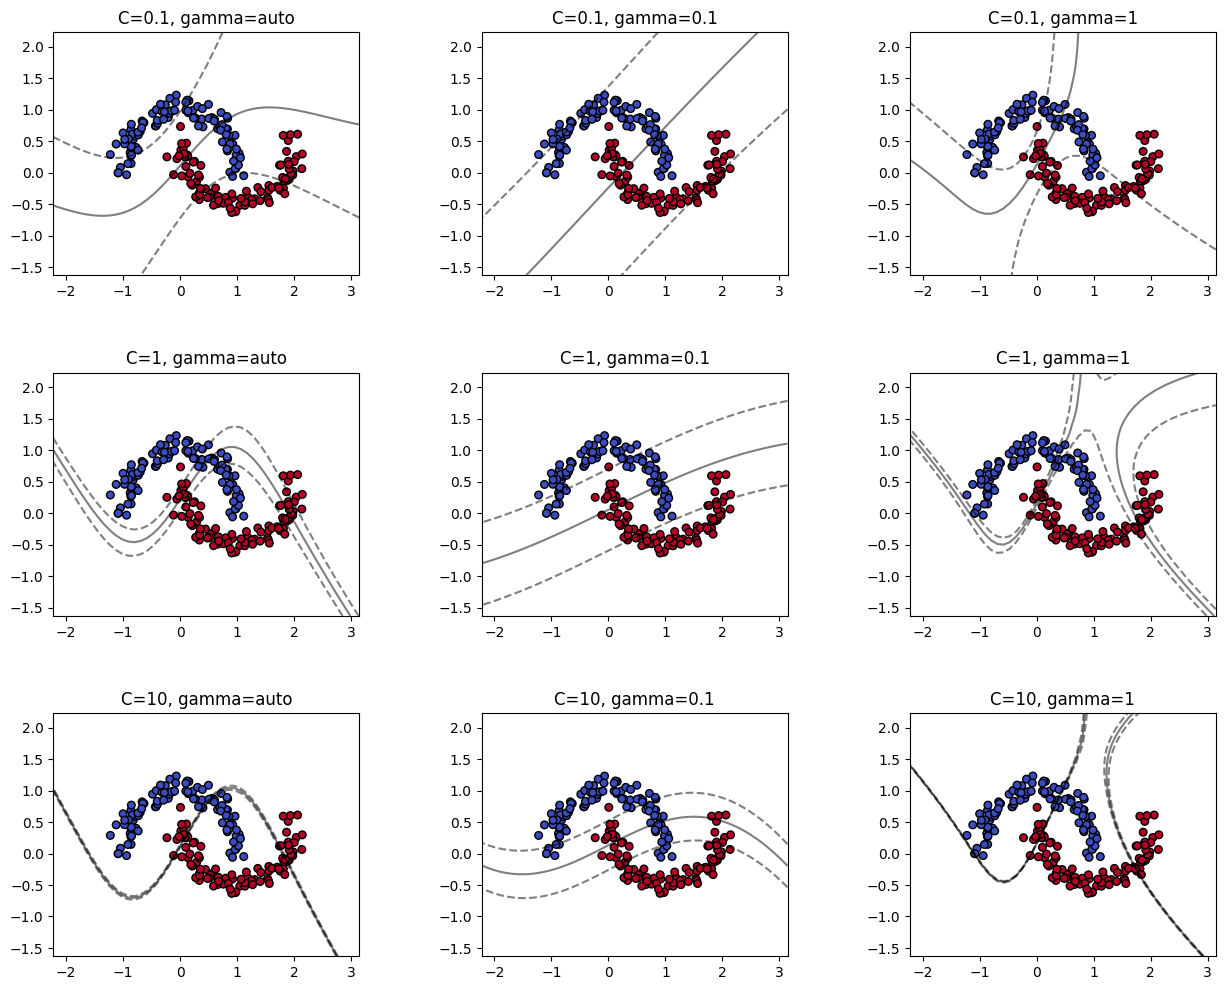

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate the make_moons dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Define a function to plot decision boundaries
def plot_decision_boundary(model, X, y, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot the dataset points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

# Set different values of C and gamma
C_values = [0.1, 1, 10]
gamma_values = ['auto', 0.1, 1]

fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterate over different parameter combinations
for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='sigmoid', C=C, gamma=gamma)
        model.fit(X, y)
        axes[i, j].set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
        axes[i, j].set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
        plot_decision_boundary(model, X, y, ax=axes[i, j])
        axes[i, j].set_title(f"C={C}, gamma={gamma}")

plt.show()